# Analysis of the data generated by Picoscope
# complete the introduction!!!!!!! maybe include the photo of the set up you made

In [14]:
import pandas as pd
import glob
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#file path with glob
path = "Picoscope_files/"
all_files = glob.glob(path + "*.csv")

In [3]:
#shows all selected files once comma is removed
all_files;

In [4]:
#turn all 512 files into lists
list = [pd.read_csv(filename,index_col=None,header=0) for filename in all_files]

In [5]:
#concat all lists and turn into 1 big dataframe
dataframe = pd.concat(list,axis=0,ignore_index=True)

In [6]:
#renaming the headers (they came as Channel 1,2,3,4 - need to know what they represent)
rename = ['Time','Green Light Residual','PMT 1 - smaller Focal Receptor', 'Green Light Pulse','PMT 2 - Larger Focal receptor']
dataframe.columns = rename

In [7]:
#identify the type of the dataframe columns
dataframe.dtypes

Time                              object
Green Light Residual              object
PMT 1 - smaller Focal Receptor    object
Green Light Pulse                 object
PMT 2 - Larger Focal receptor     object
dtype: object

Clear to see that all the dataframe columns are of type object due to default setting. To perform any graphing or data analysis we will need to convert the type into floats.

In [8]:
#observe the dataframe
dataframe

,Time,Green Light Residual,PMT 1 - smaller Focal Receptor,Green Light Pulse,PMT 2 - Larger Focal receptor
0,(ns),(mV),(mV),(mV),(V)
1,-15.30980383,0.00000000,-0.01537894,3.81397600,0.00784326
2,-15.22980382,-0.01537894,-0.16916830,3.66018700,0.00784326
3,-15.14980382,0.00000000,-0.49212600,3.59867100,0.00787402
4,-15.06980382,0.00000000,-0.92273620,3.59867100,0.00790477
...,...,...,...,...,...
338427,37.17575787,2.21456700,2.44525100,3.64480800,0.01184178
338428,37.25575788,2.67593500,2.82972400,3.59867100,0.01076526
338429,37.33575788,3.10654500,3.19881900,3.59867100,0.00971949
338430,37.41575788,3.49101900,3.52177600,3.66018700,0.00882751


From above, we can see that some of the rows will have (ns) (mV) (V) which are the units brought in as they were in the original excel sheet. We need to remove them so our dataframe can be of type float only.

In [9]:
#Axe all the rows that have the units i.e. remove the strings/objects
clean_dataframe = dataframe.drop(dataframe[dataframe['Time'] == '(ns)'].index)

In [10]:
axed_data = dataframe.shape[0] - clean_dataframe.shape[0] 
print(axed_data,'rows has been removed from original dataframe.')

512 rows has been removed from original dataframe.


Exactly 512 rows have been removed from the original dataframe, we can be confident that we have not removed extra useful data points as there are 512 excel sheets which were brought in and each had 1 row that had all the units.

Finally, we can actually change the type of the dataframe:

In [27]:
Clean_dataframe = clean_dataframe.astype(float)

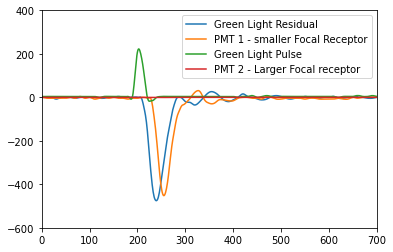

In [29]:
plot_columns = ['Green Light Residual','PMT 1 - smaller Focal Receptor', 'Green Light Pulse','PMT 2 - Larger Focal receptor']
Clean_dataframe[plot_columns].plot()
ax = plt.gca()
ax.set(xlim = (0,700), ylim = (-600,400))

plt.show()

# Dont forget to add an intro